# Методы оптимизации в машинном обучении

**Выполнила:** Набережных Д.Д.

**Группа:** НПМбд-01-19

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import oracles
import optimization
import presubmit_tests as pt
from plot_trajectory_2d import plot_levels, plot_trajectory
from sklearn.datasets import load_svmlight_file

Задание 3.5: Проверить правильность реализации подсчета градиента и гессиана логистического оракула с помощью реализованных функций. Для этого сгенерируйте небольшую модельную выборку (матрицу A и вектор b) и сравните значения, выдаваемые методами grad и hess, с соответствующими разностными аппроксимациями в нескольких пробных точках x

In [2]:
A = np.array([[1, 2], [3, -4]])
b = np.array([10, 11])
regcoef = 2
oracle = oracles.create_log_reg_oracle(A, b, regcoef)
f = lambda x: oracle.func(x)
x = np.array([1, 2])

for x in np.array([[1, 2], [-1, -2], [3, 0]]):
    print('x =', x)
    print('Градиент через grad:', oracle.grad(x))
    print('Градиент через grad_finite_diff:', oracles.grad_finite_diff(f, x))
    print('Гессиан через hess:')
    print(oracle.hess(x))
    print('Гессиан через hess_finite_diff')
    print(oracles.hess_finite_diff(f, x))
    print()

x = [1 2]
Градиент через grad: [-14.5  26. ]
Градиент через grad_finite_diff: [-14.50000013  25.99999931]
Гессиан через hess:
[[ 2.00000000e+00 -7.79748855e-24]
 [-7.79748855e-24  2.00000000e+00]]
Гессиан через hess_finite_diff
[[ 2.00003569e+00 -7.10542736e-05]
 [-7.10542736e-05  1.99989358e+00]]

x = [-1 -2]
Градиент через grad: [ -7. -14.]
Градиент через grad_finite_diff: [ -6.99999987 -14.00000009]
Гессиан через hess:
[[2.00000000e+00 1.92874985e-22]
 [1.92874985e-22 2.00000000e+00]]
Гессиан через hess_finite_diff
[[1.99996464 0.        ]
 [0.         2.00000017]]

x = [3 0]
Градиент через grad: [ 6.00000000e+00 -9.34807787e-13]
Градиент через grad_finite_diff: [5.99999996 0.        ]
Гессиан через hess:
[[2.00000000e+00 9.34807787e-14]
 [9.34807787e-14 2.00000000e+00]]
Гессиан через hess_finite_diff
[[2.00001793e+00 1.77635684e-05]
 [1.77635684e-05 2.00000017e+00]]



Проверим, что тесты в файле presubmit_tests.py проходят успешно:

In [3]:
pt.test_python3()
pt.test_QuadraticOracle()
pt.test_log_reg_usual()
pt.test_log_reg_oracle_calls()
pt.test_grad_finite_diff_1()
pt.test_grad_finite_diff_2()
pt.test_hess_finite_diff_1()
pt.test_hess_finite_diff_2()
pt.test_line_search()
pt.test_gd_basic()
pt.test_newton_basic()
pt.test_newton_1d()
pt.test_newton_fail()

Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]


## Эксперимент: Траектория градиентного спуска на квадратичной функции

Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо, Вульф)?

In [4]:
x_start = np.array([[3., 4.], [2., -4.], [-1., -1.]])
methods = [{'method': 'Constant', 'c': 0.7}, {'method': 'Constant', 'c': 0.01}, 
           {'method': 'Armijo', 'alpha_0': 100.0, 'c1':0.9}, {'method':'Armijo', 'alpha_0':1.0, 'c1':0.95}, 
           {"method":'Wolfe', 'c1':1e-4, 'c2':0.8, 'alpha_0':1.0}, {"method":'Wolfe', 'c1':0.1, 'c2':0.95, 'alpha_0':100.0}]

**Хорошо обусловленная матрица:**

In [5]:
A = np.array([[2.0, 0.], [0., 1.0]])
b = np.zeros(2)
oracle = oracles.QuadraticOracle(A, b)
print('Число обусловленности:', np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A)))

Число обусловленности: 2.5000000000000004


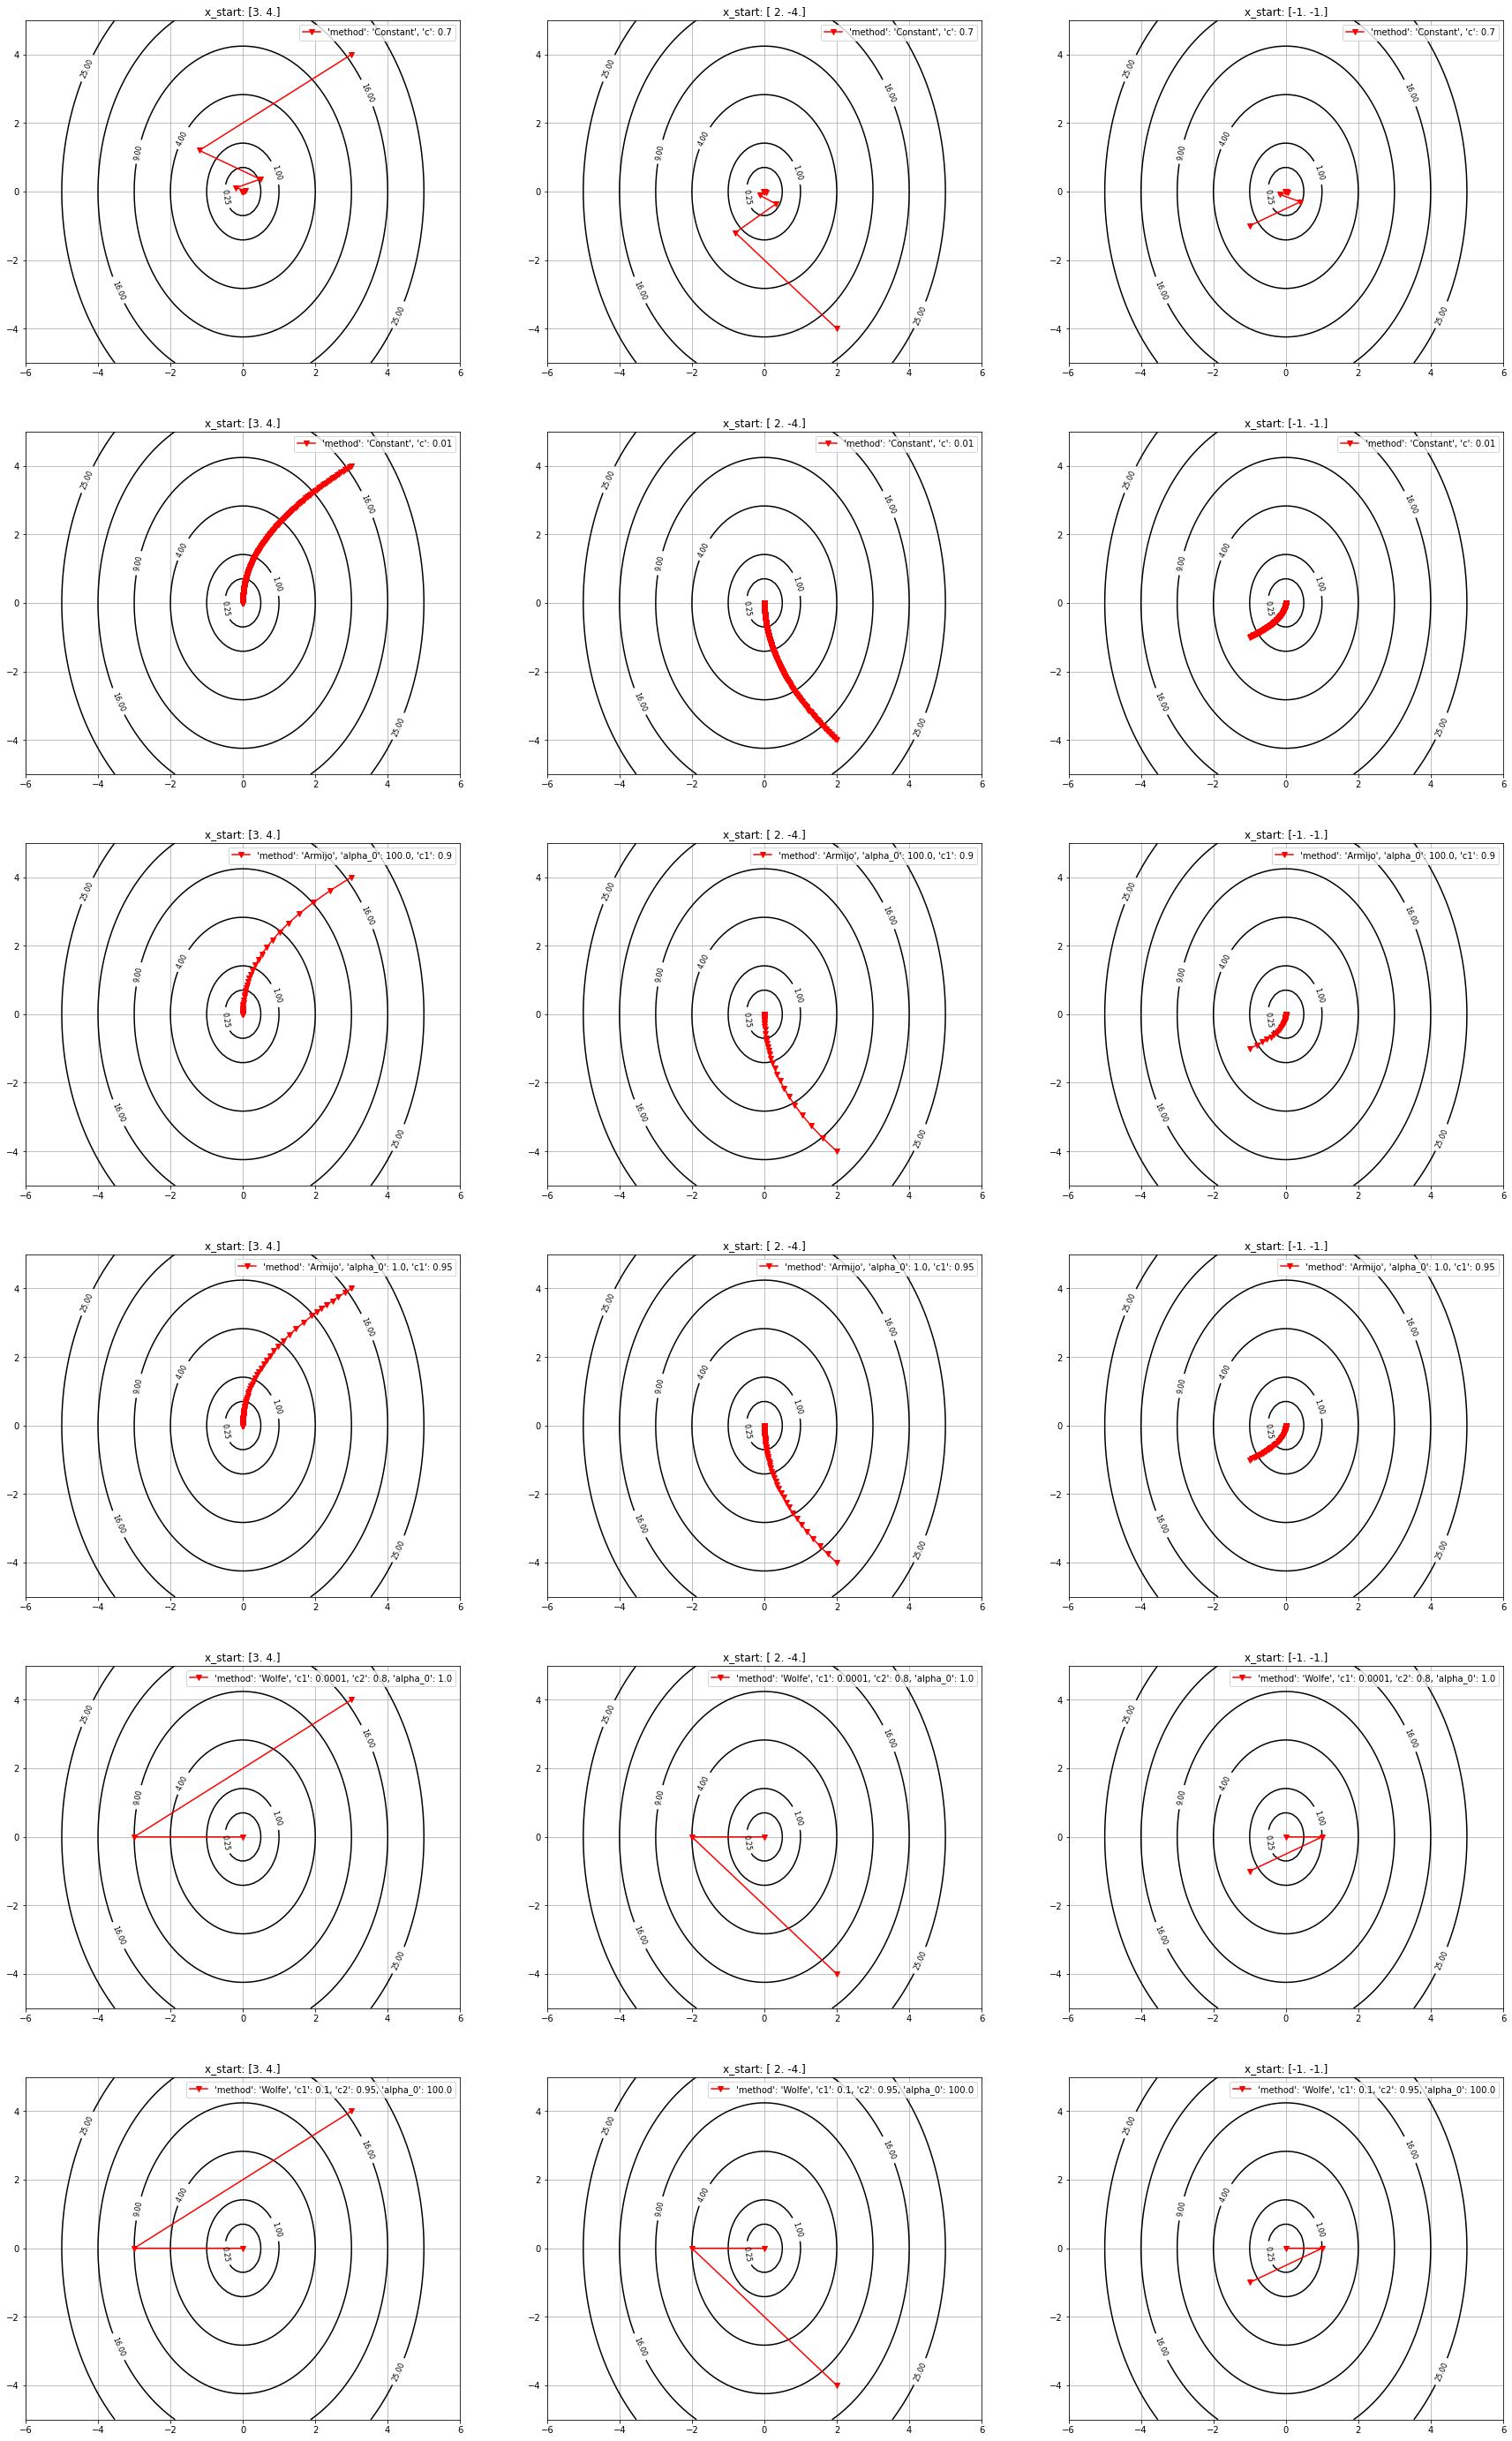

In [6]:
fig, ax = plt.subplots(len(methods), len(x_start), figsize = (30,50))
for i in range(len(methods)):
    for j in range(len(x_start)):
        [x_star, msg, history] = optimization.gradient_descent(oracle, x_start[j], line_search_options = methods[i], trace=True)
        plot_levels(oracle.func, ax[i][j])
        plot_trajectory(oracle.func, history['x'], ax[i][j], label=str(methods[i])[1:-1])
        ax[i][j].set_title("x_start: " + str(x_start[j]))
        ax[i][j].legend()

**Плохо обусловленная матрица:**

In [7]:
A = np.array([[1., -1.1],[-1.1, 2.001]])
b = np.array([2., 2.2])
oracle = oracles.QuadraticOracle(A, b)
print('Число обусловленности:', np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A)))

Число обусловленности: 9.385589127686476


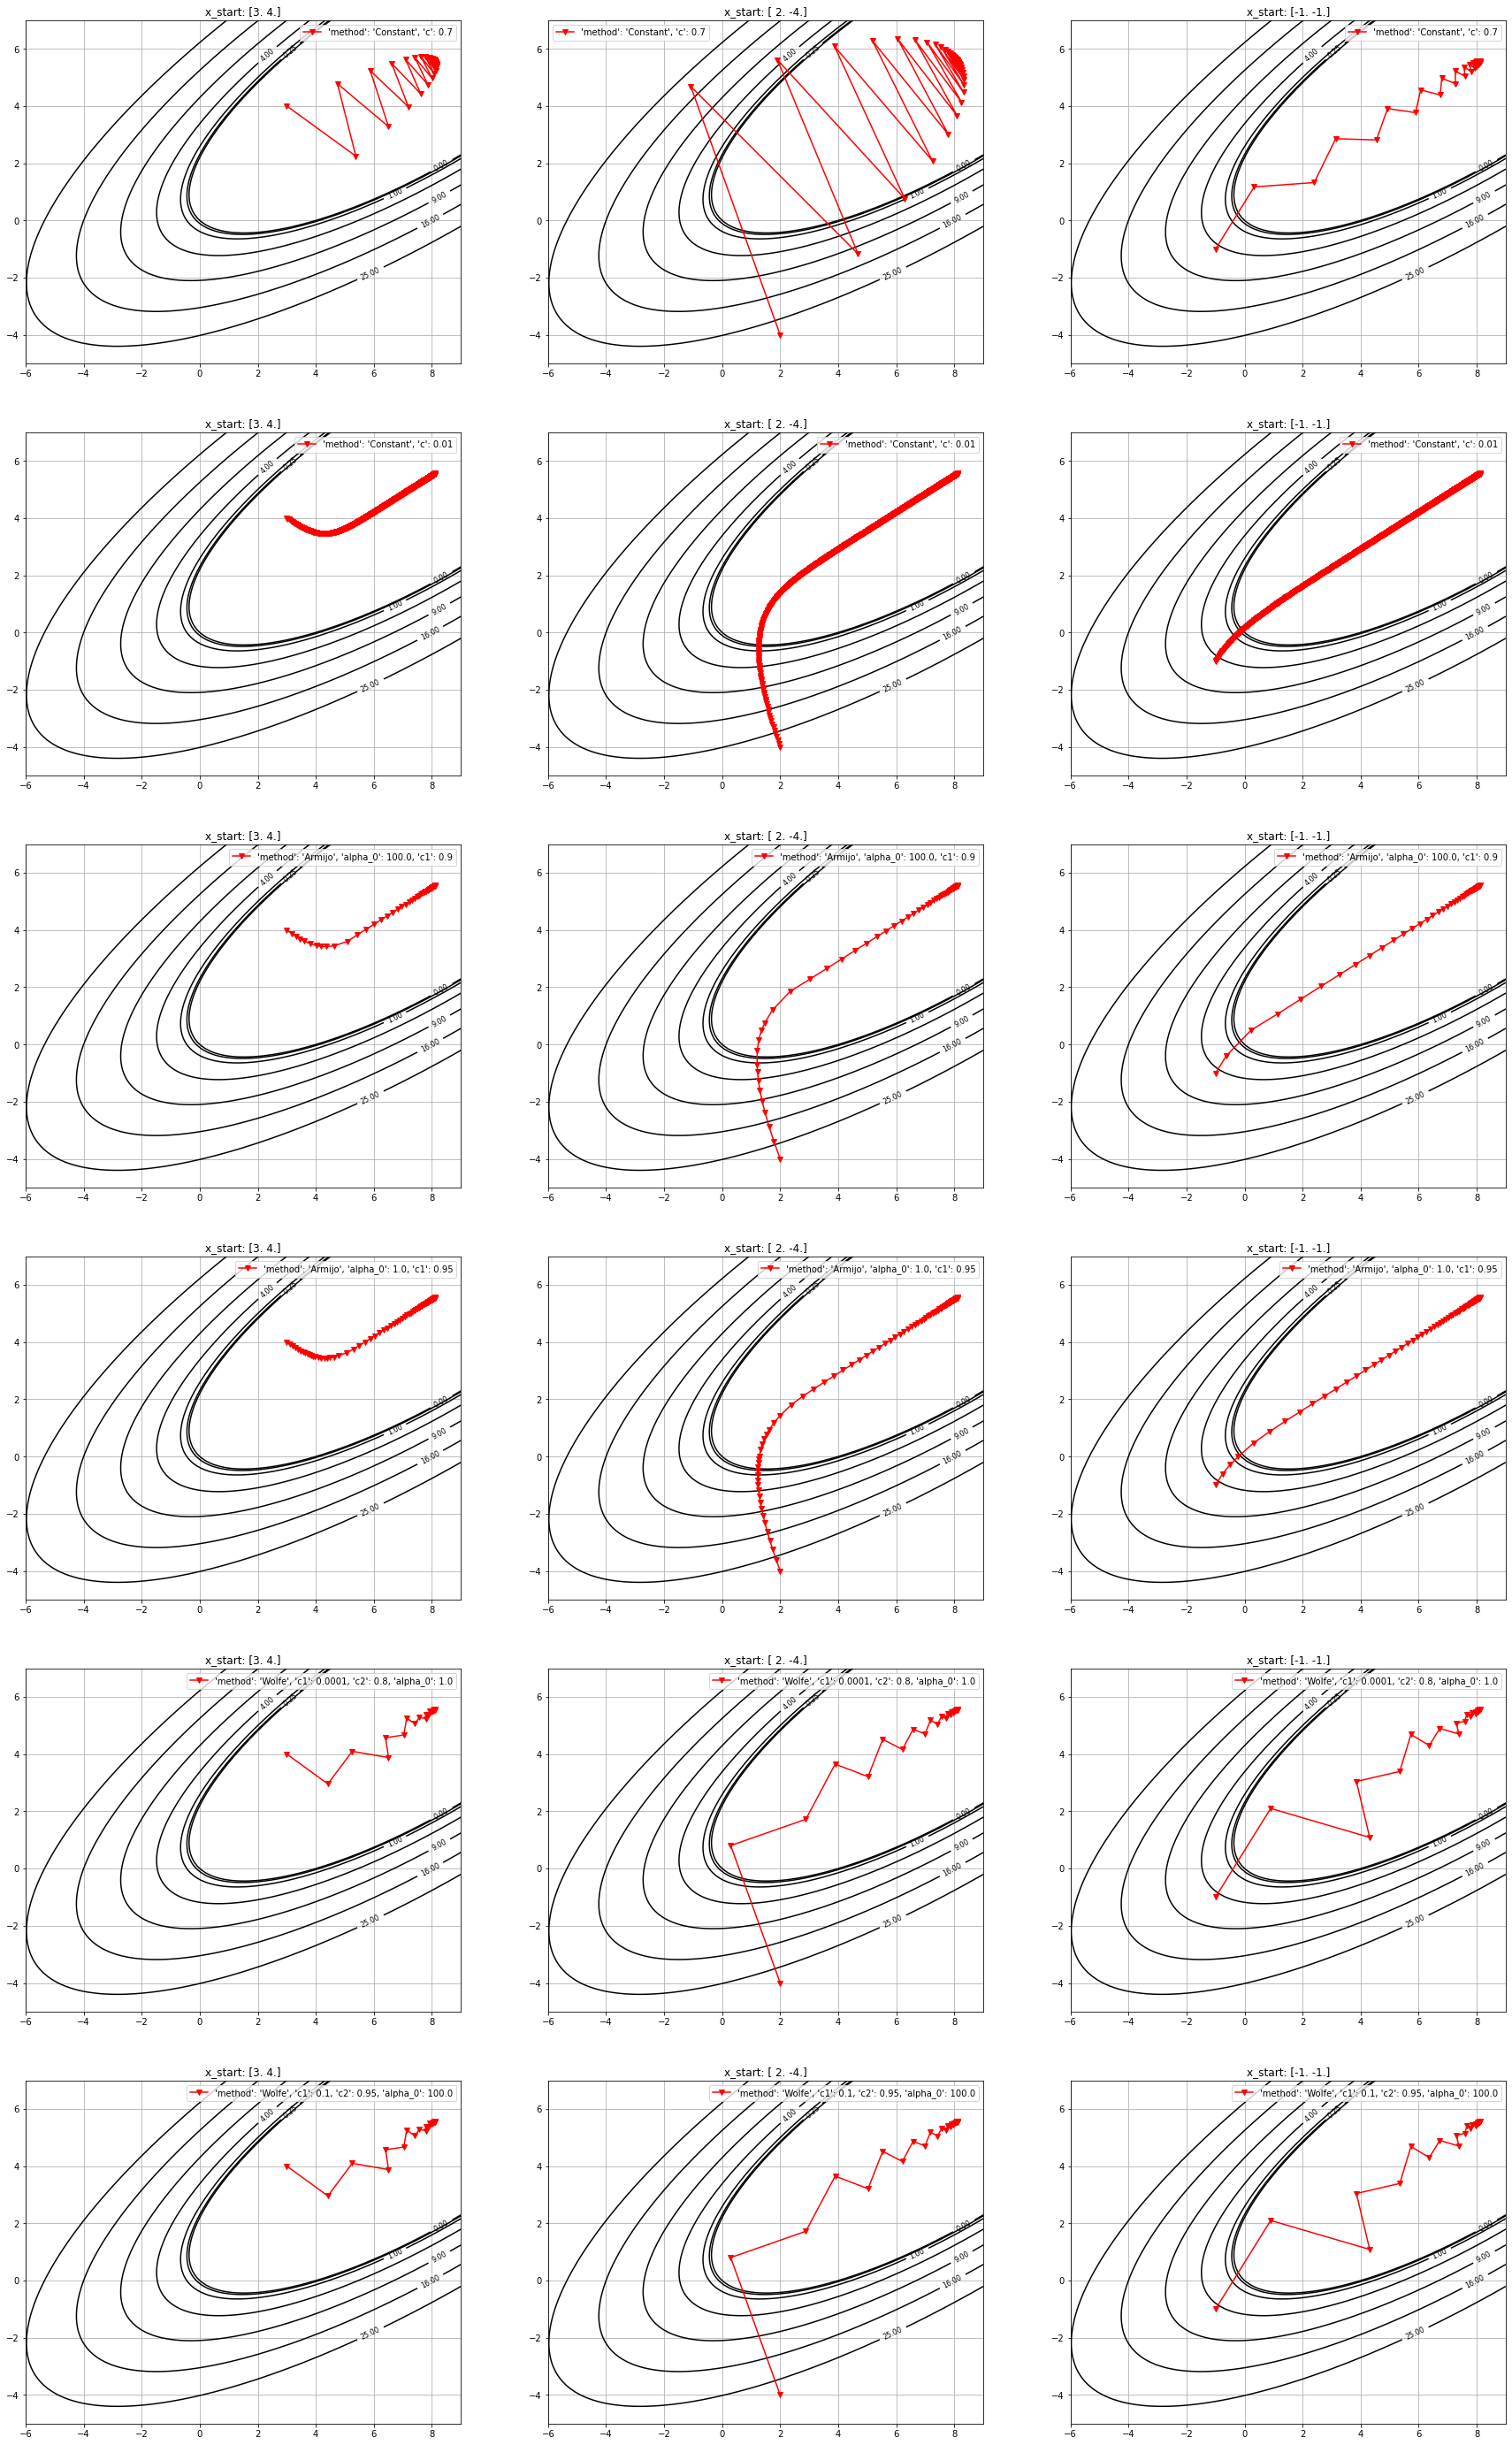

In [8]:
fig, ax = plt.subplots(len(methods), len(x_start), figsize = (30,50))
for i in range(len(methods)):
    for j in range(len(x_start)):
        [x_star, msg, history] = optimization.gradient_descent(oracle, x_start[j], line_search_options = methods[i], trace=True)
        plot_levels(oracle.func, ax[i][j], xrange=[-6,9], yrange=[-5,7])
        plot_trajectory(oracle.func, history['x'], ax[i][j], label=str(methods[i])[1:-1])
        ax[i][j].set_title("x_start: " + str(x_start[j]))
        ax[i][j].legend()

* Больше всего итераций при использовании константного метода, меньше всего итераций при использовании метода Вульфа.
* В зависимости от выбора начальной точки может увеличиться чисто итераций.
* При плохо обусловленной матрице особенно заметны характерные зигзаги.
* Чем хуже обусловлена матрица, тем больше итераций.
* Чем хуже обусловлена матрица, тем больше зигзагов на графике.
* Чем дальше начальная точка от искомого минимума, тем итераций больше.

## Эксперимент: зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров: 1) числа обусловленности κ ≥ 1 оптимизируемой функции и 2) размерности пространства n оптимизируемых переменных.

In [9]:
K = np.arange(1, 101, 10)
options = [(10, 'r'), (100, 'b'), (1000, 'g')]
methods = [{'method': 'Constant', "c":0.01}, 
           {'method':'Armijo', 'alpha_0':1.0, 'c1':0.95}, 
           {"method":'Wolfe', 'c1':1e-3, 'c2':0.9, 'alpha_0':1.0}]

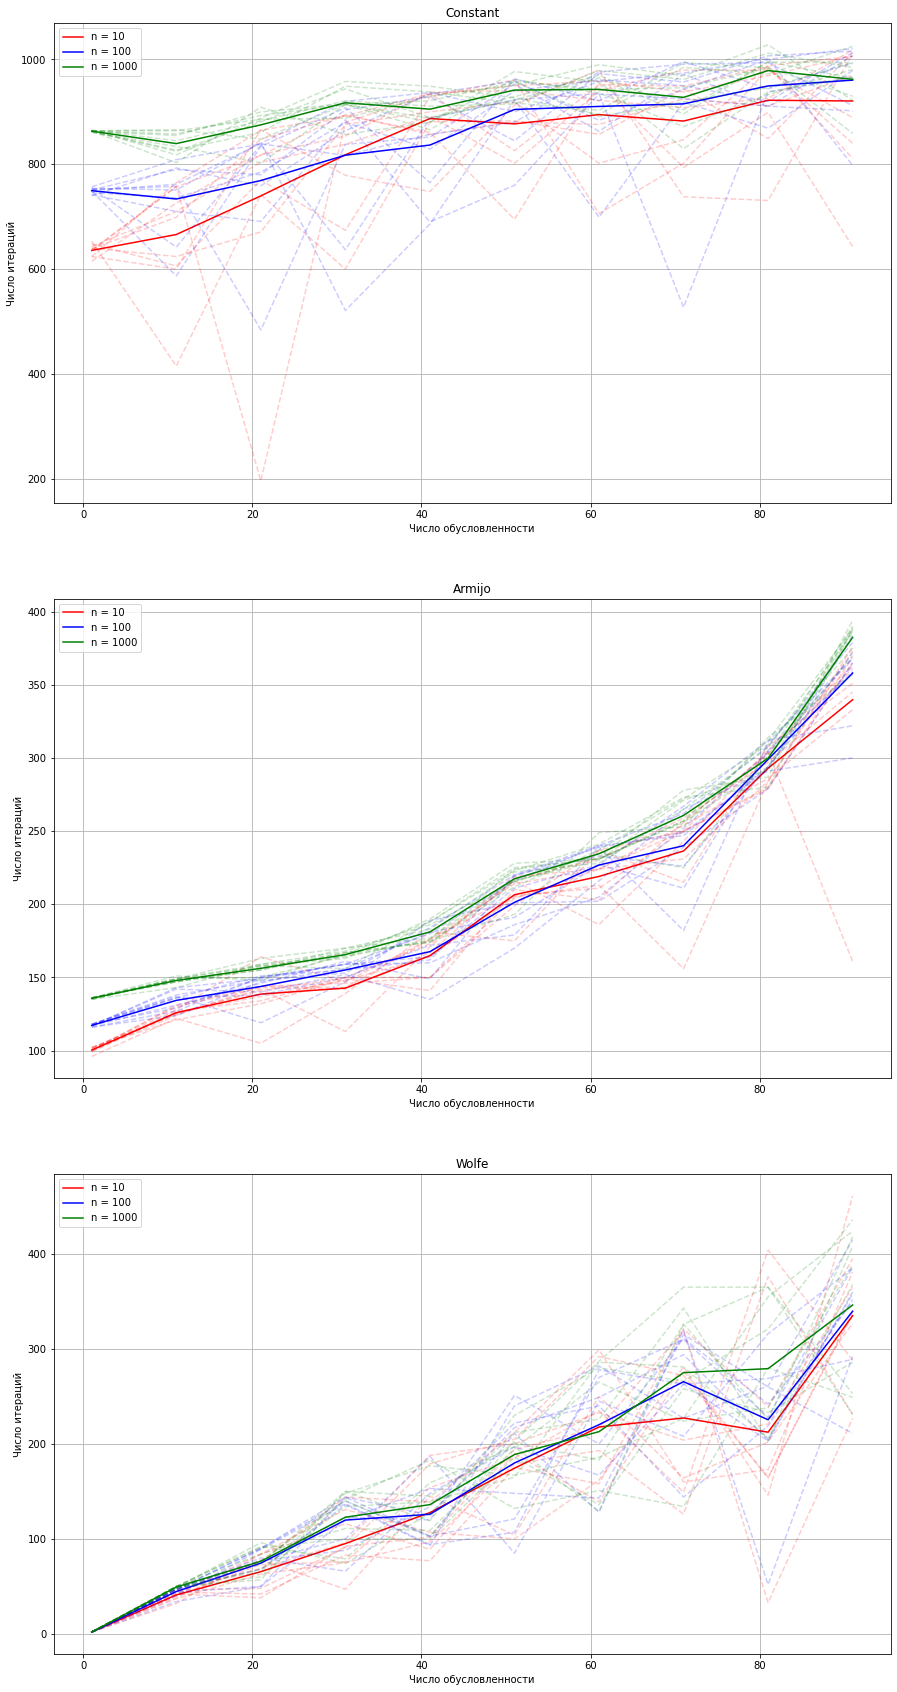

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(15,30))

for i in range(len(methods)):
    for option in options:
        I = np.zeros(len(K))
        for j in range(10):
            it = []
            for k in K:
                diag = np.random.uniform(1, k, option[0])
                diag[0] = 1.; diag[-1] = k
                A = scipy.sparse.diags(diag)
                b = np.random.rand(option[0])*k
                oracle = oracles.QuadraticOracle(A, b)
                _, _, history = optimization.gradient_descent(oracle, np.ones(option[0]), 
                                                              line_search_options = methods[i], trace=True)
                it.append(len(history['func']))
            I += np.array(it)
            ax[i].plot(K, it, color=option[1], linestyle='dashed', alpha=0.2)
        ax[i].plot(K, I / 10, color=option[1], label=('n = '+str(option[0])))
        ax[i].legend()
        ax[i].set_xlabel("Число обусловленности")
        ax[i].set_ylabel("Число итераций")
        ax[i].set_title(methods[i]['method'])
        ax[i].grid()

С ростом числа обусловленности растёт число итераций (линейно), однако размерность не критично влияет на рост числа итераций.

## Эксперимент: cравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

Сравним методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на реальных данных.

В качестве реальных данных используем следующие три набора с сайта LIBSVM3: w8a, gisette и real-sim. Коэффициент регуляризации возьмем стандартным образом: λ = 1/m.

Параметры обоих методов возьмем равными параметрам по умолчанию. Начальную точку выберем $x_0 = 0.$

In [11]:
def graph_compare(svm_file):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    A, b = load_svmlight_file(svm_file)
    regcoef = 1 / len(b)
    oracle = oracles.create_log_reg_oracle(A, b, regcoef)
    
    _, _, history_gd = optimization.gradient_descent(oracle, np.zeros(A.shape[1]), trace=True)
    ax[0].plot(history_gd['time'], history_gd['func'], label='Градиентный спуск')

    _, _, history_n = optimization.newton(oracle, np.zeros(A.shape[1]), trace=True)
    ax[0].plot(history_n['time'], history_n['func'], label='Метод Ньютона')
    
    ax[0].set_xlabel('Реальное время работы метода')
    ax[0].set_ylabel('Значение функции')
    ax[0].legend()

    ax[1].plot(history_gd['time'], np.array(history_gd['grad_norm']) ** 2 / history_gd['grad_norm'][0] ** 2, label="Градиентный спуск")
    ax[1].plot(history_n['time'], np.array(history_n['grad_norm']) ** 2 / history_n['grad_norm'][0] ** 2, label="Метод Ньютона")
    
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Реальное время работы метода')
    ax[1].set_ylabel('Относительный квадрат нормы градиента')
    ax[1].legend()

Сравнение методов для данных из w8a:

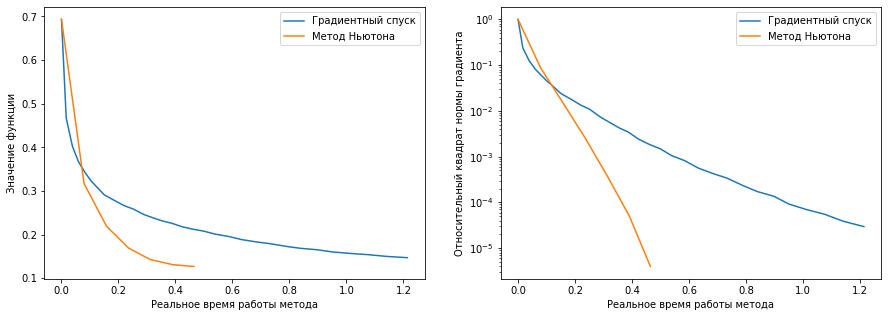

In [12]:
graph_compare('данные/w8a.txt')

Сравнение методов для данных из gisette_scale.t:

In [ ]:
# graph_compare('данные/gisette_scale.t.bz2')
# graph_compare('данные/real-sim.bz2')

Метод градиентного спуска во всех случаях работает дольше метода Ньютона, хотя в начале работает, наоборот, быстрее. Для набора данных w8a графики получились более гладкими, чем для набора данных gisette, у которого заметен скачкообразный характер для зависимости относительного квадрата нормы градиента против реального времени работы.